## Notas de aula de Mecânica Quântica <br> Autor: Jonas Maziero

Link para o vídeo da aula sobre este tópico: .

In [1]:
%run init.ipynb

# Potencial função delta
Este potencial é de certa forma similar ao potencial barreira, que vimos na aula anterior. No entanto, enquanto a largura e altura do potencial barreira são finitas, neste caso a altura é infinita e a largura é infinitesimalmente pequena. O potencial função delta pode ser escrito, sem perda de generalidade, como
\begin{equation}
U(x) = -\alpha\delta(x),
\end{equation}
com $\alpha$ sendo uma constante positiva e a função delta é tal que
\begin{equation}
\delta(x)= \begin{cases}0 \text{ se } x\ne0, \\ \infty\text{ se }x=0,\end{cases}
\end{equation}
com as restrições 
\begin{equation}
\int_{-\infty}^{+\infty}\delta(x)dx=1
\end{equation}
e 
\begin{equation}
\int_{-\infty}^{+\infty}\delta(x-a)f(x)dx=f(a).
\end{equation}
Um exemplo de sistema físico onde este potencial seria relevante é para o espalhamento por uma carga elétrica 'pontual', cuja densidade de carga elétrica é uma função delta.

A equação de Schrödinger independente do tempo para essa energia potencial é escrita como
\begin{equation}
-\frac{\hbar^{2}}{2m}\partial_{xx}\psi(x)-\alpha\delta(x)\psi(x)=E\psi(x).
\end{equation}

## Estados ligados: $E<0$
Nessa caso, para $x<0$ e para $x>0$ temos $V(x)=0$ e assim a EqSIT1D fica 
\begin{equation}
\partial_{xx}\psi-(-2mE/\hbar)\psi=\partial_{xx}\psi-k^{2}\psi=0,
\end{equation}
com
\begin{equation}
k=\sqrt{-2mE}/\hbar.
\end{equation}
A solução geral dessa eq. diferencial é $\psi(x)=c_{p}e^{kx}+c_{n}e^{-kx}$. Como a função de onda deve ir pra zero quando $x\rightarrow\pm\infty$, zeramos os coeficientes de acordo obtendo
\begin{align}
& \psi(x>0)=c_{n}e^{-kx}, \\
& \psi(x<0)=c_{p}e^{kx}.
\end{align}
Para continuidade da função de onda, essas duas funções devem ter o mesmo valor em $x=0$, o que implica que $c_{n}=c_{p}$, i.e.,
\begin{align}
& \psi(x>0)=c_{p}e^{-kx}, \\
& \psi(x<0)=c_{p}e^{kx}.
\end{align}
Seguindo, impomos a condição de normalização para obtermos a constante:
\begin{align}
1 &=\int_{-\infty}^{+\infty}|\psi(x)|^{2}dx = \int_{-\infty}^{0}|\psi(x<0)|^{2}dx + \int_{0}^{+\infty}|\psi(x>0)|^{2}dx \\
&= |c_{p}|^{2}\left(\int_{-\infty}^{0}e^{2kx}dx + \int_{0}^{+\infty}e^{-2kx}dx\right) = |c_{p}|^{2}\left(\left(\frac{e^{2kx}}{2k}\right)_{-\infty}^{0} + \left(\frac{e^{-2kx}}{-2k}\right)_{0}^{\infty}\right) \\
&= |c_{p}|^{2}(1/2k+1/2k), \\
& \therefore c_{p}=\sqrt{k}.
\end{align}
Assim
\begin{equation}
\begin{cases}\psi(x\ge0)=\sqrt{k}e^{-kx}, \\ \psi(x<0)=\sqrt{k}e^{kx}.\end{cases} \therefore \psi(x)=\sqrt{k}e^{-k|x|}.
\end{equation}
Essa função de onda está ilustrada na figura abaixo.

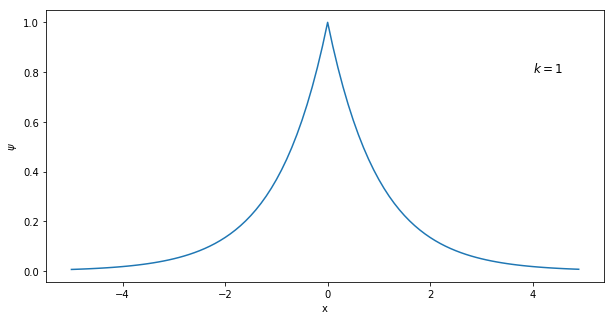

In [21]:
def psi(k,x):
    return sqrt(k)*exp(-k*abs(x))
xm = 5; x = np.arange(-xm,xm,0.1); k = 1; d = x.shape[0]; y = np.zeros(d)
for j in range(0,d):
    y[j] = psi(k,x[j])
fig = plt.figure(figsize=(10,5)); plt.annotate(r'$k=$'+str(k)[:5], xy=(xm-1,0.9), xytext=(xm-1,0.8), fontsize=12)
plt.plot(x,y); plt.xlabel('x'); plt.ylabel(r'$\psi$'); plt.show()

Para obter os possíveis valores da energia vamos fazer o seguinte. A 1ª derivada da função de onda não é contínua em $x=0$, pois o potencial é $-\infty$ nesse ponto. Então vamos integrar a EqSIT1D no intervalo $[-\epsilon,\epsilon]$ para $\epsilon\rightarrow 0$:
\begin{align}
& \int_{-\epsilon}^{\epsilon}\Big(-\frac{\hbar^{2}}{2m}\Big)\frac{\partial^{2}\psi(x)}{\partial x^{2}}dx +\int_{-\epsilon}^{\epsilon}U(x)\psi(x)dx = \int_{-\epsilon}^{\epsilon}E\psi(x)dx, \\
& \therefore -\frac{\hbar^{2}}{2m}\int_{-\epsilon}^{\epsilon}d\Big(\frac{\partial\psi(x)}{\partial x}\Big)dx -\alpha\int_{-\epsilon}^{\epsilon}\delta(x)\psi(x)dx = E\int_{-\epsilon}^{\epsilon}\psi(x)dx, \\
& \therefore -\frac{\hbar^{2}}{2m}\Big(\Big(\frac{\partial\psi(x)}{\partial x}\Big)_{\epsilon} -\Big(\frac{\partial\psi(x)}{\partial x}\Big)_{-\epsilon}\Big) -\alpha\psi(0)= E\Big(\psi(0)(0-(-\epsilon))+\psi(\epsilon)(\epsilon-0)\Big), \\
& \therefore -\frac{\hbar^{2}}{2m}\Delta\Big(\frac{\partial\psi(x)}{\partial x}\Big) -\alpha\psi(0)= E\Big(\psi(0)+\psi(\epsilon)\Big)\epsilon=0, \\
& \therefore \Delta\Big(\frac{\partial\psi(x)}{\partial x}\Big) = -\frac{2m\alpha}{\hbar^{2}}\psi(0).
\end{align}

Como a derivada da função de onda é
\begin{align}
& \partial_{x}\psi(x\ge0)=\partial_{x}\Big(\sqrt{k}e^{-kx}\Big)=-k\sqrt{k}e^{-kx}, \\
& \partial_{x}\psi(x<0)=\partial_{x}\Big(\sqrt{k}e^{kx}\Big) = k\sqrt{k}e^{kx},
\end{align}
teremos que
\begin{align}
& \Delta\Big(\frac{\partial\psi(x)}{\partial x}\Big) = \Big(\partial_{x}\psi(x\ge0)\Big)_{\epsilon} - \Big(\partial_{x}\psi(x<0)\Big)_{-\epsilon} = -k\sqrt{k}e^{-k\epsilon}-k\sqrt{k}e^{k(-\epsilon)} \\
& =-2k\sqrt{k}e^{-k\epsilon} \approx -2k\sqrt{k} = -\frac{2m\alpha}{\hbar^{2}}\psi(0) = -\frac{2m\alpha}{\hbar^{2}}\sqrt{k}, \\
& \therefore k = \frac{m\alpha}{\hbar^{2}} = \frac{\sqrt{-2mE}}{\hbar}.
\end{align}
Por conseguinte, para a energia potencial função delta $U(x)=-\alpha\delta(x)$ temos um único estado ligado
\begin{equation}
\psi(x) = \frac{\sqrt{m\alpha}}{\hbar}e^{-m\alpha |x|/\hbar^{2}}
\end{equation}
com energia
\begin{equation}
E = -\frac{m\alpha^{2}}{2\hbar}.
\end{equation}

## Espalhamento: $E>0$
Nesse caso, para $x\ne0$ teremos da EqSIT1D que 
\begin{equation}
\partial_{xx}\psi(x\ne0)+(2mE/\hbar^{2})\psi(x\ne0)=:\partial_{xx}\psi(x\ne0)+k^{2}\psi(x\ne0)=0,
\end{equation}
em que definimos
\begin{equation}
k = \sqrt{2mE}/\hbar.
\end{equation}
As soluções gerais dessa eq. podem ser escritas como
\begin{align}
& \psi(x<0) = c_{ed}e^{ikx}+c_{ee}e^{-ikx}, \\
& \psi(x>0) = c_{dd}e^{ikx}+c_{de}e^{-ikx}.
\end{align}
Vamos considerar o quanton movimentando-se inicialmente na região $x<0$ no sentido de $x$ crescente. Nesse caso, uma vez que o quanton passou para a região $x>0$ não há porquê este se movimentar no sentido de $x$ decrescente. Por isso impomos que
\begin{equation}
c_{de}=0.
\end{equation}

Seguindo, impomos a continuidade da função de onda em $x=0$:
\begin{equation}
c_{ed}e^{ik0}+c_{ee}e^{-ik0} = c_{dd}e^{ik0} \therefore c_{ed}+c_{ee}=c_{dd}.
\end{equation}

Aqui também temos que a derivada 1ª não é contínua em $x=0$, e usaremos novemente $\Delta\Big(\frac{\partial\psi(x)}{\partial x}\Big) = -\frac{2m\alpha}{\hbar^{2}}\psi(0)$. Para isso notemos que
\begin{align}
& \partial_{x}\psi(x<0) = ik(c_{ed}e^{ikx}-c_{ee}e^{-ikx}), \\
& \partial_{x}\psi(x>0) = ik c_{dd}e^{ikx}.
\end{align}
Assim, para $\epsilon\rightarrow 0$, teremos
\begin{align}
\Delta\Big(\frac{\partial\psi(x)}{\partial x}\Big) &= \Big(\frac{\partial\psi(x)}{\partial x}\Big)_{\epsilon} - \Big(\frac{\partial\psi(x)}{\partial x}\Big)_{-\epsilon} \\
&= ik c_{dd}e^{-ik\epsilon} - ik(c_{ed}e^{ik\epsilon}-c_{ee}e^{-ik\epsilon}) \approx ik(c_{dd}-c_{ed}+c_{ee}) \\
& = 2m\alpha(c_{ed}+c_{ee})/\hbar^{2}.
\end{align}

Substituind $c_{dd}$ nessa última eq. obteremos
\begin{align}
& ik(c_{ed}+c_{ee}-c_{ed}+c_{ee}) = \frac{2m\alpha}{\hbar^{2}}(c_{ed}+c_{ee}), \\
& \therefore \Big(2ik-\frac{2m\alpha}{\hbar^{2}}\Big)c_{ee} = \frac{2m\alpha}{\hbar^{2}}c_{ed} \therefore c_{ee}= \frac{m\alpha/\hbar^{2}}{ik-m\alpha/\hbar^{2}}c_{ed}.
\end{align}
O coeficiente de reflexão é assim dado por
\begin{align}
R &= |c_{ee}|^{2}/|c_{ed}|^{2} = \Big|\frac{m\alpha/\hbar^{2}}{ik-m\alpha/\hbar^{2}}\Big|^{2} \\
&= \frac{m^{2}\alpha^{2}/\hbar^{4}}{(ik-m\alpha/\hbar^{2})(-ik-m\alpha/\hbar^{2})} = \frac{m^{2}\alpha^{2}/\hbar^{4}}{k^{2}+m^{2}\alpha^{2}/\hbar^{4}} \\
& = \frac{1}{1+ \hbar^{4}k^{2}/m^{2}\alpha^{2}}  = \frac{1}{1+ \hbar^{4}(2mE/\hbar^{2})/m^{2}\alpha^{2}} \\
& = \frac{1}{1+ 2\hbar^{2}E/m\alpha^{2}}.
\end{align}
Já o coeficiente de transmissão é
\begin{equation}
T = 1-R = \frac{1+2\hbar^{2}E/m\alpha^{2}-1}{1+2\hbar^{2}E/m\alpha^{2}} = \frac{1}{1+m\alpha^{2}/2\hbar^{2}E}.
\end{equation}

In [50]:
def coeff(al):
    fig = plt.figure(figsize=(8,5)); m = 1; hbb = 1
    E = np.arange(0.0001,3,0.05); T = 1/(1+(m*al**2)/(2*E*hbb**2)); R = 1-T
    plt.plot(E,R); plt.plot(E,T); plt.xlim(0,3); plt.ylim(-0.01,1.01)
    plt.xlabel(r'$E$'); plt.legend((r'$R$',r'$T$'),loc=(0.5,0.5))
    plt.annotate(r'$\alpha=$'+str(al)[:5], xy=(0.2,0.9), xytext=(0.2,0.9), fontsize=12)
    plt.show()
interactive(coeff, al=(0.01,1,0.05))

interactive(children=(FloatSlider(value=0.46, description='al', max=1.0, min=0.01, step=0.05), Output()), _dom…

---
# Exercícios

1. Calcule a integral $\int_{-\infty}^{\infty}e^{x+3}\delta(x+3)dx$.

1. Considere $U(x)=\alpha\delta(x)$ com $\alpha$ sendo um número real positivo. Existem estados ligados (com $E<0$) nesse caso? Para espalhamento por esse potencial, quais são os coeficientes de trasmissão e de reflexão?

1. A matriz de transferência, ou matriz $S$, é definida por $\begin{bmatrix}c_{dd}\\c_{de}\end{bmatrix}=\begin{bmatrix}S_{1,1}&S_{1,2}\\S_{2,1}&S_{2,2}\end{bmatrix}\begin{bmatrix}c_{ed}\\c_{ee}\end{bmatrix}$. Obtenha os elementos dessa matriz, $S_{j,k}$, no caso do problema de espalhamento por um potencial função delta tratado nestas notas de aula.